<a href="https://colab.research.google.com/github/Nikithakadaparthi/ICP_4_Diabetes/blob/main/ICP_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes (1).csv


In [3]:
!pip install tensorflow

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import mnist
import numpy as np

In [5]:
# Load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess data
x_train = x_train.reshape((x_train.shape[0], -1)).astype('float32') / 255
x_test = x_test.reshape((x_test.shape[0], -1)).astype('float32') / 255


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
# Define the model
def create_model():
    model = Sequential([
        Dense(128, activation='relu', input_shape=(784,)),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Create and train the model
model = create_model()
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8739 - loss: 0.4237 - val_accuracy: 0.9612 - val_loss: 0.1248
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9685 - loss: 0.1012 - val_accuracy: 0.9668 - val_loss: 0.1073
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9787 - loss: 0.0703 - val_accuracy: 0.9752 - val_loss: 0.0836
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9844 - loss: 0.0489 - val_accuracy: 0.9773 - val_loss: 0.0753
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9876 - loss: 0.0387 - val_accuracy: 0.9762 - val_loss: 0.0806


In [7]:
# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Baseline model accuracy: {accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9728 - loss: 0.0913
Baseline model accuracy: 0.9762


In [8]:
# Define a more complex model
def create_complex_model():
    model = Sequential([
        Dense(512, activation='relu', input_shape=(784,)),
        Dense(256, activation='relu'),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Create and train the more complex model
complex_model = create_complex_model()
complex_history = complex_model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.8654 - loss: 0.4189 - val_accuracy: 0.9575 - val_loss: 0.1369
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9692 - loss: 0.1044 - val_accuracy: 0.9668 - val_loss: 0.1027
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9791 - loss: 0.0705 - val_accuracy: 0.9759 - val_loss: 0.0881
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 10ms/step - accuracy: 0.9842 - loss: 0.0531 - val_accuracy: 0.9736 - val_loss: 0.0884
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9875 - loss: 0.0416 - val_accuracy: 0.9747 - val_loss: 0.0966


In [9]:
# Evaluate the complex model
complex_loss, complex_accuracy = complex_model.evaluate(x_test, y_test)
print(f"Complex model accuracy: {complex_accuracy:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9710 - loss: 0.1136
Complex model accuracy: 0.9747


In [11]:
from google.colab import files
uploaded = files.upload()

Saving Breas Cancer.csv to Breas Cancer (1).csv


In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [13]:
# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
# Define the model
def create_model():
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')  # Binary classification
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create and train the model
model = create_model()
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.6978 - loss: 0.6068 - val_accuracy: 0.9386 - val_loss: 0.3527
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9021 - loss: 0.3431 - val_accuracy: 0.9561 - val_loss: 0.2125
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9357 - loss: 0.2203 - val_accuracy: 0.9649 - val_loss: 0.1462
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9452 - loss: 0.1556 - val_accuracy: 0.9737 - val_loss: 0.1134
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9430 - loss: 0.1437 - val_accuracy: 0.9737 - val_loss: 0.0971
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9648 - loss: 0.1143 - val_accuracy: 0.9737 - val_loss: 0.0849
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9698 - loss: 0.1018 - val_accuracy: 0.9649 - val_loss: 0.0806
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9831 - loss: 0.0796 - val_accuracy: 0.9649 - val_los

In [15]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Basic model accuracy: {accuracy:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9578 - loss: 0.0807 
Basic model accuracy: 0.9649


In [16]:
# Define a more complex model
def create_complex_model():
    model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(8, activation='relu'),
        Dense(1, activation='sigmoid')  # Binary classification
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create and train the more complex model
complex_model = create_complex_model()
complex_history = complex_model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.7257 - loss: 0.6049 - val_accuracy: 0.9561 - val_loss: 0.3747
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9725 - loss: 0.3136 - val_accuracy: 0.9825 - val_loss: 0.1336
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9741 - loss: 0.1316 - val_accuracy: 0.9825 - val_loss: 0.0610
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9756 - loss: 0.0855 - val_accuracy: 0.9825 - val_loss: 0.0542
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9919 - loss: 0.0443 - val_accuracy: 0.9825 - val_loss: 0.0568
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9877 - loss: 0.0430 - val_accuracy: 0.9649 - val_loss: 0.0648
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9902 - loss: 0.0334 - val_accuracy: 0.9649 - val_loss: 0.0738
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9850 - loss: 0.0607 - val_accuracy: 0.9649 - val_loss

In [17]:
# Evaluate the complex model
complex_loss, complex_accuracy = complex_model.evaluate(X_test, y_test)
print(f"Complex model accuracy: {complex_accuracy:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9651 - loss: 0.0849 
Complex model accuracy: 0.9649


In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [19]:
# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [20]:
# Define the model
def create_model():
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')  # Binary classification
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create and train the model
model = create_model()
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.8007 - loss: 0.5193 - val_accuracy: 0.9649 - val_loss: 0.2818
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9346 - loss: 0.2726 - val_accuracy: 0.9737 - val_loss: 0.1617
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9560 - loss: 0.1527 - val_accuracy: 0.9825 - val_loss: 0.1104
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9735 - loss: 0.1262 - val_accuracy: 0.9825 - val_loss: 0.0875
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9774 - loss: 0.0975 - val_accuracy: 0.9825 - val_loss: 0.0762
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9834 - loss: 0.0716 - val_accuracy: 0.9737 - val_loss: 0.0719
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9839 - loss: 0.0669 - val_accuracy: 0.9737 - val_loss: 0.0677
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9810 - loss: 0.0649 - val_accuracy: 0.9737 - val_loss: 0.0646


In [21]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Basic model accuracy with normalized data: {accuracy:.4f}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9613 - loss: 0.0799 
Basic model accuracy with normalized data: 0.9737


In [22]:
# Define a more complex model
def create_complex_model():
    model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(8, activation='relu'),
        Dense(1, activation='sigmoid')  # Binary classification
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create and train the more complex model
complex_model = create_complex_model()
complex_history = complex_model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - accuracy: 0.8122 - loss: 0.5862 - val_accuracy: 0.9561 - val_loss: 0.2972
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9387 - loss: 0.2664 - val_accuracy: 0.9737 - val_loss: 0.1095
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9655 - loss: 0.1277 - val_accuracy: 0.9737 - val_loss: 0.0715
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9755 - loss: 0.0802 - val_accuracy: 0.9825 - val_loss: 0.0650
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9849 - loss: 0.0619 - val_accuracy: 0.9912 - val_loss: 0.0607
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9935 - loss: 0.0355 - val_accuracy: 0.9737 - val_loss: 0.0646
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9791 - loss: 0.0665 - val_accuracy: 0.9825 - val_loss: 0.0635
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9904 - loss: 0.0445 - val_accuracy: 0.9825 - val_

In [23]:
# Evaluate the complex model
complex_loss, complex_accuracy = complex_model.evaluate(X_test, y_test)
print(f"Complex model accuracy with normalized data: {complex_accuracy:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9794 - loss: 0.0915 
Complex model accuracy with normalized data: 0.9825


In [24]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical


In [25]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [26]:
# Define the model
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the 28x28 images
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')  # Output layer with 10 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_test, y_test))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8731 - loss: 0.4233 - val_accuracy: 0.9565 - val_loss: 0.1430
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.9672 - loss: 0.1075 - val_accuracy: 0.9717 - val_loss: 0.0949
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9783 - loss: 0.0695 - val_accuracy: 0.9707 - val_loss: 0.1015
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9839 - loss: 0.0519 - val_accuracy: 0.9713 - val_loss: 0.0970
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9865 - loss: 0.0412 - val_accuracy: 0.9763 - val_loss: 0.0841
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9898 - loss: 0.0294 - val_accuracy: 0.9765 - val_loss: 0.0859
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9913 - loss: 0.0257 - val_accuracy: 0.9788 - val_loss: 0.0773
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9927 - loss: 0.022

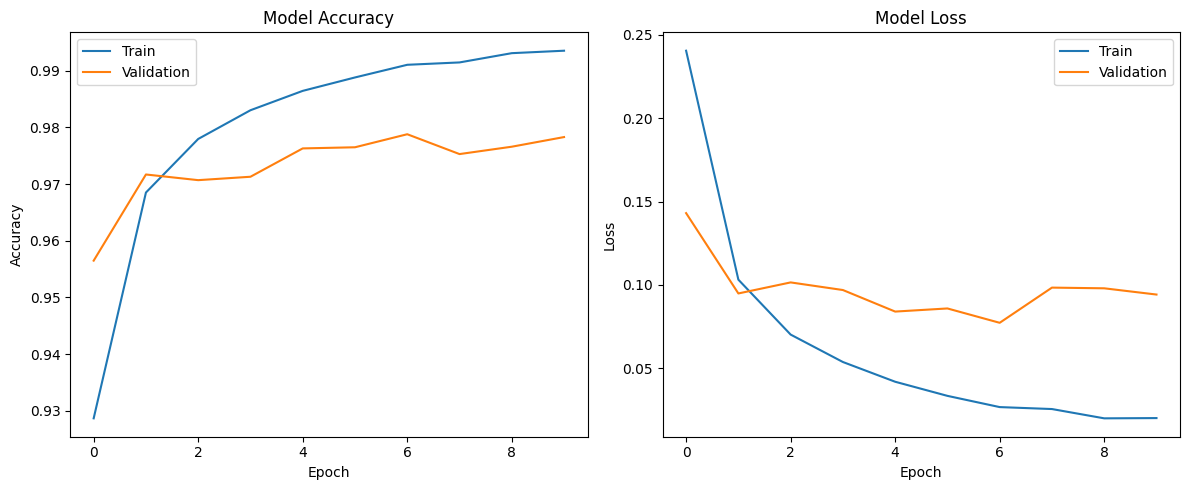

In [27]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

plt.tight_layout()
plt.show()

In [28]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical


In [29]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [30]:
# Define the model
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the 28x28 images
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')  # Output layer with 10 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train,
          epochs=10,
          batch_size=32,
          validation_data=(x_test, y_test))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8725 - loss: 0.4311 - val_accuracy: 0.9656 - val_loss: 0.1111
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9689 - loss: 0.1025 - val_accuracy: 0.9695 - val_loss: 0.0946
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9780 - loss: 0.0726 - val_accuracy: 0.9777 - val_loss: 0.0727
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9840 - loss: 0.0497 - val_accuracy: 0.9770 - val_loss: 0.0776
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9876 - loss: 0.0382 - val_accuracy: 0.9777 - val_loss: 0.0771
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9906 - loss: 0.0285 - val_accuracy: 0.9776 - val_loss: 0.0789
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9923 - loss: 0.0233 - val_accuracy: 0.9782 - val_loss: 0.0771
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9932 - loss: 0.01

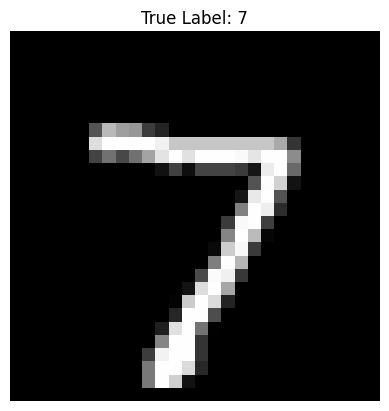

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Predicted Label: 7


In [31]:
# Select an image from the test set
index = 0  # Change this index to test different images
test_image = x_test[index]
test_label = y_test[index]

# Plot the image
plt.imshow(test_image, cmap='gray')
plt.title(f'True Label: {np.argmax(test_label)}')
plt.axis('off')
plt.show()

# Reshape the image for the model
test_image = np.expand_dims(test_image, axis=0)  # Add batch dimension

# Perform inference
predictions = model.predict(test_image)
predicted_class = np.argmax(predictions[0])

print(f'Predicted Label: {predicted_class}')


In [32]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical


In [33]:
def create_model_with_activation(activation_func):
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation=activation_func),
        Dense(64, activation=activation_func),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

def create_model_with_different_layers(activation_func):
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(256, activation=activation_func),
        Dense(128, activation=activation_func),
        Dense(64, activation=activation_func),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model


In [34]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

Training model with activation function: tanh
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8830 - loss: 0.4110 - val_accuracy: 0.9624 - val_loss: 0.1356
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9632 - loss: 0.1228 - val_accuracy: 0.9661 - val_loss: 0.1126
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9750 - loss: 0.0825 - val_accuracy: 0.9739 - val_loss: 0.0882
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9830 - loss: 0.0562 - val_accuracy: 0.9765 - val_loss: 0.0753
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9874 - loss: 0.0416 - val_accuracy: 0.9735 - val_loss: 0.0850
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9898 - loss: 0.0335 - val_accuracy: 0.9764 - val_loss: 0.0782
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9922 - loss: 0.0251 - val_accuracy: 0.9768 - val_loss: 0.0801
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1

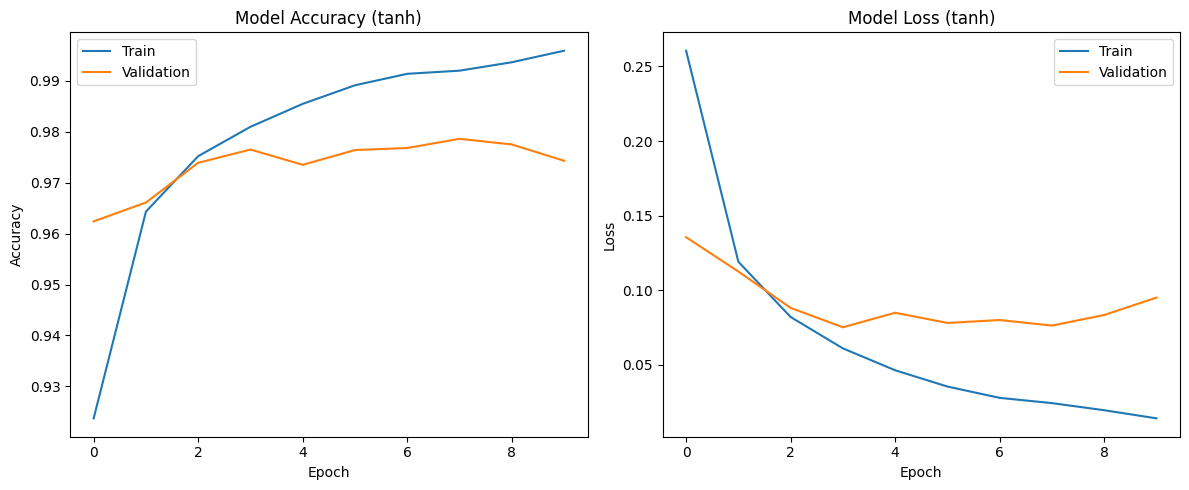

Training model with activation function: sigmoid
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7933 - loss: 0.8470 - val_accuracy: 0.9350 - val_loss: 0.2188
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9424 - loss: 0.1979 - val_accuracy: 0.9572 - val_loss: 0.1419
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9602 - loss: 0.1323 - val_accuracy: 0.9643 - val_loss: 0.1152
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9721 - loss: 0.0951 - val_accuracy: 0.9691 - val_loss: 0.1000
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9791 - loss: 0.0726 - val_accuracy: 0.9713 - val_loss: 0.0920
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9847 - loss: 0.0536 - val_accuracy: 0.9742 - val_loss: 0.0800
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9877 - loss: 0.0437 - val_accuracy: 0.9773 - val_loss: 0.0720
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━

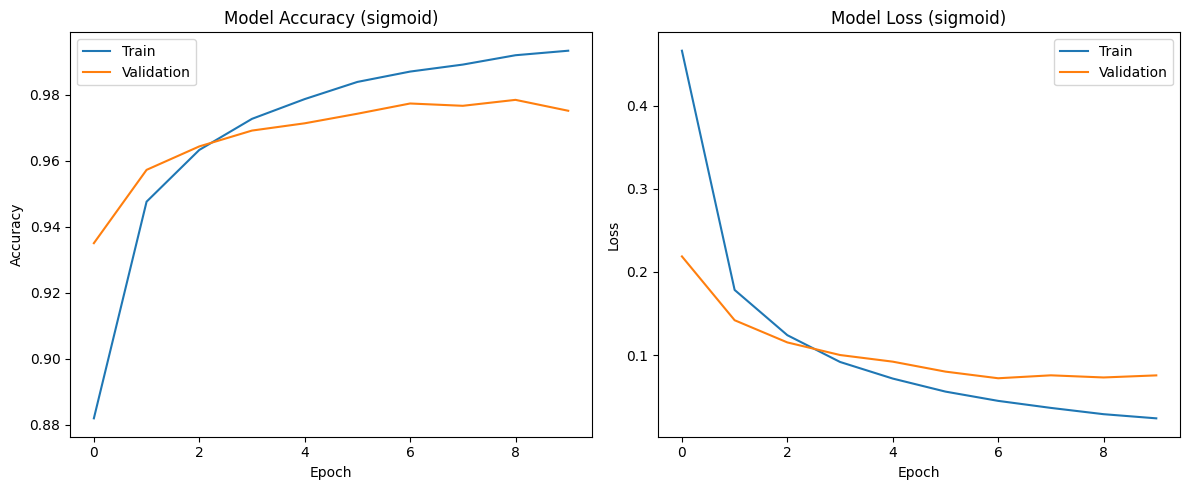

In [35]:
# Activation functions to test
activation_functions = ['tanh', 'sigmoid']

for activation in activation_functions:
    print(f"Training model with activation function: {activation}")

    # Create and train the model
    model = create_model_with_activation(activation)
    history = model.fit(x_train, y_train,
                        epochs=10,
                        batch_size=32,
                        validation_data=(x_test, y_test))

    # Evaluate the model
    loss, accuracy = model.evaluate(x_test, y_test)
    print(f"Model accuracy with activation {activation}: {accuracy:.4f}")

    # Plot training & validation accuracy and loss
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'Model Accuracy ({activation})')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'])

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'Model Loss ({activation})')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'])

    plt.tight_layout()
    plt.show()


Training model with activation function: tanh (No Scaling)
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7613 - loss: 0.7705 - val_accuracy: 0.8573 - val_loss: 0.4562
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8616 - loss: 0.4417 - val_accuracy: 0.8782 - val_loss: 0.3838
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.8808 - loss: 0.3764 - val_accuracy: 0.8828 - val_loss: 0.3630
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8882 - loss: 0.3530 - val_accuracy: 0.9062 - val_loss: 0.3053
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9018 - loss: 0.3166 - val_accuracy: 0.8954 - val_loss: 0.3234
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9011 - loss: 0.3144 - val_accuracy: 0.9064 - val_loss: 0.3018
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9084 - loss: 0.2896 - val_accuracy: 0.9079 - val_loss: 0.2876
Epoch 8/10
1875/1875 ━━━━━━━━

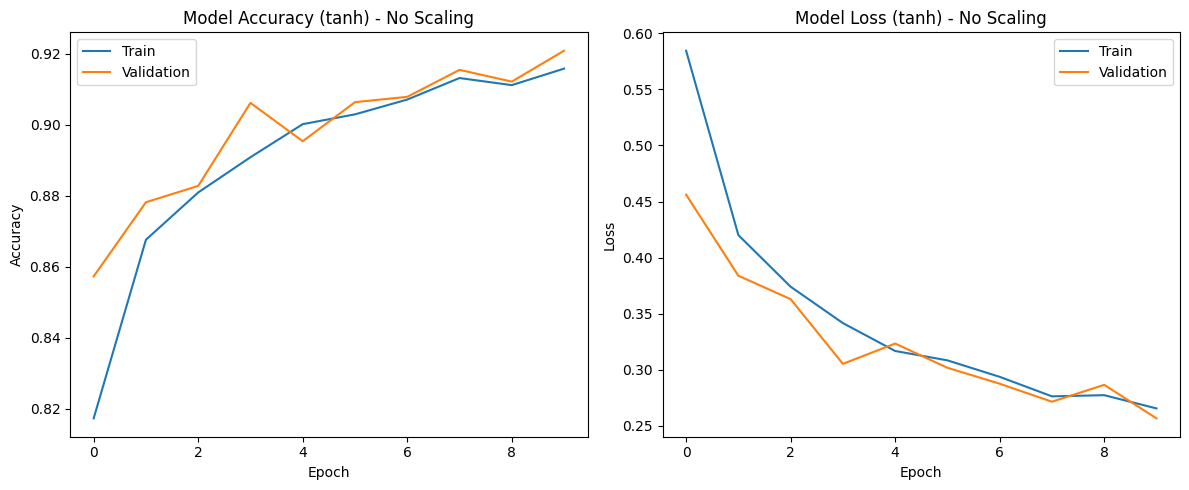

Training model with activation function: sigmoid (No Scaling)
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7666 - loss: 0.9130 - val_accuracy: 0.8874 - val_loss: 0.3681
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8918 - loss: 0.3565 - val_accuracy: 0.9095 - val_loss: 0.3022
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9006 - loss: 0.3179 - val_accuracy: 0.9127 - val_loss: 0.2855
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9078 - loss: 0.2960 - val_accuracy: 0.9186 - val_loss: 0.2615
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9177 - loss: 0.2666 - val_accuracy: 0.9189 - val_loss: 0.2610
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9227 - loss: 0.2541 - val_accuracy: 0.9269 - val_loss: 0.2367
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9252 - loss: 0.2464 - val_accuracy: 0.9282 - val_loss: 0.2293
Epoch 8/10
1875/1875 ━━━━━

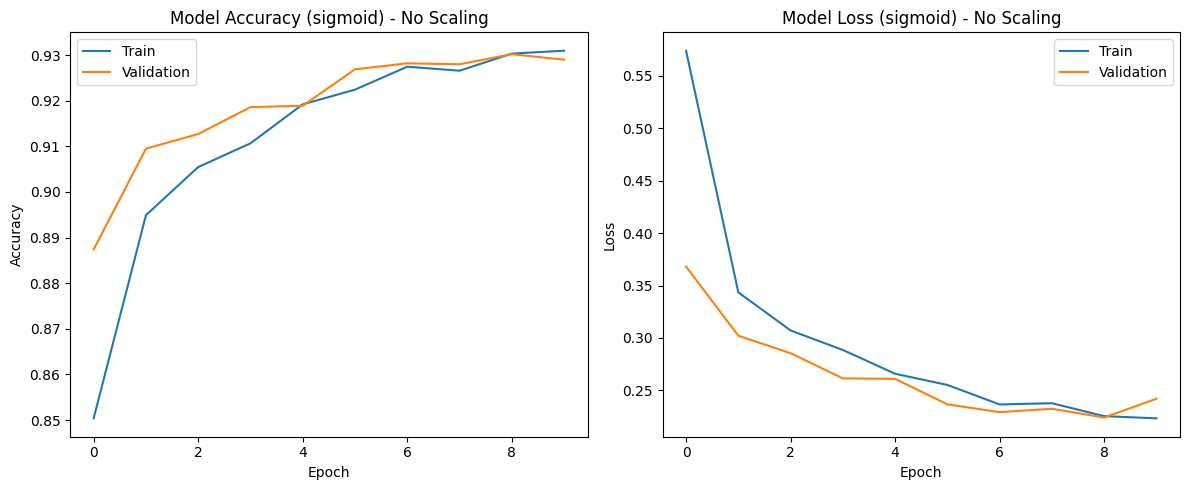

In [36]:
# Load the MNIST dataset without scaling
(x_train_no_scale, y_train_no_scale), (x_test_no_scale, y_test_no_scale) = mnist.load_data()

# One-hot encode the labels
y_train_no_scale = to_categorical(y_train_no_scale, 10)
y_test_no_scale = to_categorical(y_test_no_scale, 10)

# Train and evaluate models with no scaling and different activation functions
for activation in activation_functions:
    print(f"Training model with activation function: {activation} (No Scaling)")

    # Create and train the model
    model_no_scale = create_model_with_activation(activation)
    history_no_scale = model_no_scale.fit(x_train_no_scale, y_train_no_scale,
                                          epochs=10,
                                          batch_size=32,
                                          validation_data=(x_test_no_scale, y_test_no_scale))

    # Evaluate the model
    loss_no_scale, accuracy_no_scale = model_no_scale.evaluate(x_test_no_scale, y_test_no_scale)
    print(f"Model accuracy with activation {activation} (No Scaling): {accuracy_no_scale:.4f}")

    # Plot training & validation accuracy and loss
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history_no_scale.history['accuracy'])
    plt.plot(history_no_scale.history['val_accuracy'])
    plt.title(f'Model Accuracy ({activation}) - No Scaling')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'])

    plt.subplot(1, 2, 2)
    plt.plot(history_no_scale.history['loss'])
    plt.plot(history_no_scale.history['val_loss'])
    plt.title(f'Model Loss ({activation}) - No Scaling')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'])

    plt.tight_layout()
    plt.show()
